# Preparing a text dataset

In [1]:
# Temp hacky workaround until pandas read_json encoding issue gets resolved in python 2.7
# https://github.com/pandas-dev/pandas/issues/15132
# The default output streams are captured and restored otherwise ipython cells wont show log messages.
import sys
default_stdout = sys.stdout
default_stderr = sys.stderr
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = default_stdout
sys.stderr = default_stderr

import pandas as pd
df = pd.read_json('datasets/yelp_academic_dataset_review.json', lines=True, encoding='utf-8')

In [2]:
df.head()

,business_id,cool,date,funny,review_id,stars,text,type,useful,user_id
0,2aFiy99vNLklCx3T_tGS9A,0,2011-10-10,0,NxL8SIC5yqOdnlXCg18IBg,5,If you enjoy service by someone who is as comp...,review,0,KpkOkG6RIf4Ra25Lhhxf1A
1,2aFiy99vNLklCx3T_tGS9A,0,2010-12-29,0,pXbbIgOXvLuTi_SPs1hQEQ,5,After being on the phone with Verizon Wireless...,review,1,bQ7fQq1otn9hKX-gXRsrgA
2,2aFiy99vNLklCx3T_tGS9A,0,2011-04-29,0,wslW2Lu4NYylb1jEapAGsw,5,Great service! Corey is very service oriented....,review,0,r1NUhdNmL6yU9Bn-Yx6FTw
3,2LfIuF3_sX6uwe-IR-P0jQ,1,2014-07-14,0,GP6YEearUWrzPtQYSF1vVg,5,Highly recommended. Went in yesterday looking ...,review,0,aW3ix1KNZAvoM8q-WghA3Q
4,2LfIuF3_sX6uwe-IR-P0jQ,0,2014-01-15,0,25RlYGq2s5qShi-pn3ufVA,4,I walked in here looking for a specific piece ...,review,0,YOo-Cip8HqvKp_p9nEGphw


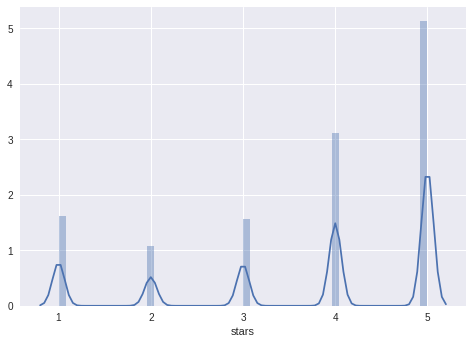

In [ ]:
%matplotlib inline
import seaborn as sb
sb.distplot(df['stars'])

In [ ]:
from keras_text.data import Dataset
from keras_text.processing import SentenceWordTokenizer

X = df['text'].values
y = df['stars'].values
tokenizer = SentenceWordTokenizer()
tokenizer.build_vocab(X)

Using TensorFlow backend.


1767933/4153150 [===========>..................] - ETA: 5338s

In [ ]:
ds = Dataset(X, y, tokenizer=tokenizer)
ds.update_test_indices()
ds.save('datasets/yelp_sent_dataset')

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=False)


def plot_histogram(title, data, cumulative=True):
    trace = go.Histogram(x=data, histnorm='percent', 
                         cumulative={'enabled': cumulative})
    layout = go.Layout(
        title=title
    )
    fig = go.Figure(data=[trace], layout=layout)
    iplot(fig)


plot_histogram('Words per sentence', ds.tokenizer.get_counts(1))
ds.tokenizer.get_stats(1)